In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


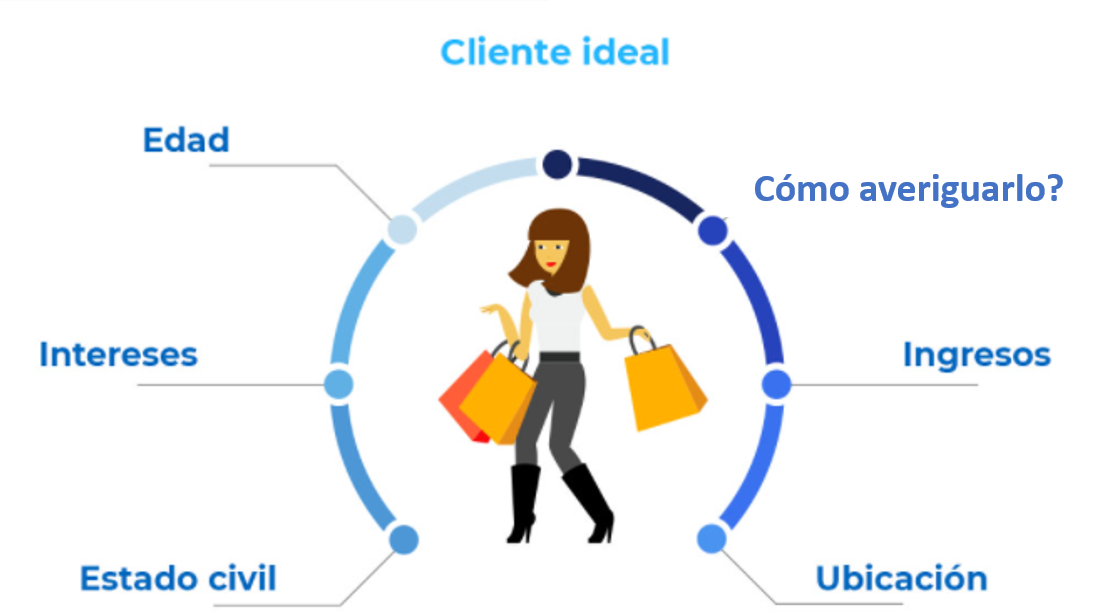

In [2]:
import sys
print(sys.version)

3.7.10 | packaged by conda-forge | (default, Sep 13 2021, 19:43:44) 
[GCC 9.4.0]


In [3]:
conda install kneed

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - kneed


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.10.8          |   py37h89c1867_1         145 KB  conda-forge
    conda-4.10.3               |   py37h89c1867_3         3.1 MB  conda-forge
    kneed-0.7.0                |     pyh9f0ad1d_0          12 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  kneed              conda-forge/noarch::kneed-0.7.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  certifi                          2021.10.8-py37h89c1867_0 --> 2021.10.8-py37h89c1867_1
  conda                               4.10.3-py37h89c1867_2 --> 4.10.3-py37h89c1867_3



conda-4.10.3         | 3.1 MB    | #

In [4]:
!pip install --upgrade Kneed

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.mixture import GaussianMixture #GMM
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import argparse
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
from yellowbrick.cluster import distortion_score

In [6]:
from kneed import KneeLocator

In [7]:
data=pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep="\t")

In [8]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
data['Income'].isnull().sum()

24

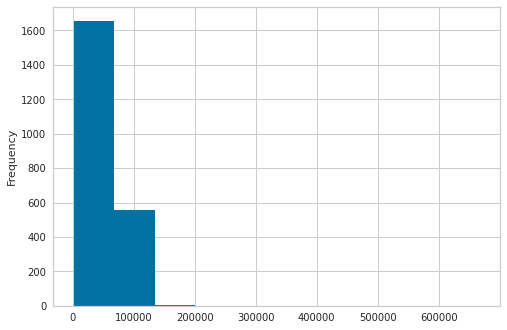

In [11]:
data['Income'].plot.hist();
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()  

In [12]:
median = data['Income'].median() 

In [13]:
data['Income'].fillna(median, inplace = True)

In [14]:
data['Income'].isnull().sum()

0

In [15]:
# Validando los tipos de datos en el dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [16]:
data.size # tenemos un tamaño de los datos de 

64960

# Descripción de las Caracteristicas
Se tienen 29 caracteristicas

Customer Personality Analysis

El análisis de la personalidad del cliente es un análisis detallado de los clientes ideales de una empresa. Ayuda a una empresa a comprender mejor a sus clientes y les facilita la modificación de productos de acuerdo con las necesidades, los comportamientos y las preocupaciones específicas de los diferentes tipos de clientes.

El análisis de la personalidad del cliente ayuda a una empresa a modificar su producto en función de sus clientes objetivo de diferentes tipos de segmentos de clientes.

## Información referente a las personas o clientes

* ID: identificador , codigo de cliente, valor único
* Year_Birth: el año de nacimiento de los clientes.
* Education: Nivel educativo de los clientes
* Marital_Status: CEstado civil de los clientes
* Income: Ingreso de los clientes expresado en forma anual 
* Kidhome: Numeros de niños por hogar
* Teenhome: Numero de adolescentes por hogar 
* Dt_Customer: Fecha en que el cliente se vinculó con la empresa
* Recency: Numero de días desde la última compra *
* Complain: Indicador si el cliente se a quejado en lso ultimos años. 1 indica que sí. o indica que no.
## Información sobre los productos de consumo

* MntWines: El monto que los clientes gastan en vinos o bebidas alcoholicas en los ultimos 2 años. 
* MntFruits: El monto que los clientes gastan en frutas en los ultimos 2 años
* MntMeatProducts: El monto que los clientes gastan en productos carnicos en los ultimos 2 años 
* MntFishProducts: El monto que los clientes gastan en pescado en los ultimos 2 años
* MntSweetProducts: El monto que los clientes gastan en dulces o golocinas en los ultimos 2 años *
* MntGoldProds: El monto que los clientes gastan en productos de oro, en los ultimos dos años.
## Información sobre caracteristicas promocionales en el proceso de compra

* NumDealsPurchases: Number of purchases made with a discount. AcceptedCmp1: 1 indica si el cliente aceptó la oferta en la primer campaña, 0 que no.
* AcceptedCmp2: 1 indica si el cliente aceptó la oferta en la segunda campaña , 0 que no. 
* AcceptedCmp3: 1 indica si el cliente aceptó la oferta en la tercer campaña , 0 que no.
* AcceptedCmp4: 1 indica si el cliente aceptó la oferta en la cuarta campaña , 0 que no. 
* AcceptedCmp5: 1 indica si el cliente aceptó la oferta en la quinta campaña , 0 que no.
* Response: 1 ndica si el cliente aceptó la oferta en la ultima campaña, 0 que no.
* Medios de compra o canal de compra, en que el cliente elige para el proceso de compra

* NumWebPurchases: Cantidad de compras realizadas por medio de la pagina web.
* NumCatalogPurchases: Cantidad de compras realizadas por medio del catalogo. 
* NumStorePurchases: Cantidad de compras realizadas directamente en las tiendas.
* NumWebVisitsMonth: Cantidad de visitas a la pagina de la empresa en el ultimo mes.

# EDA - Analisis Exploratorio de Datos

**EDA - Analisis Exploratorio de Datos**

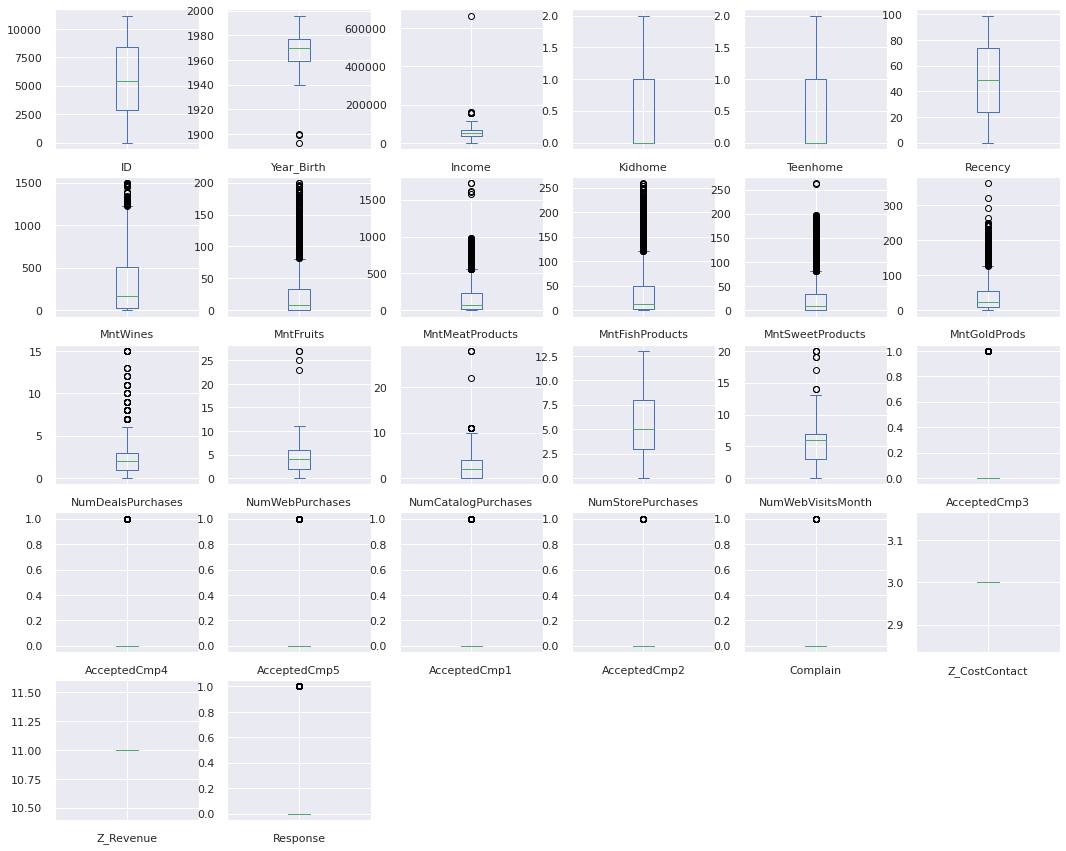

In [117]:
data.plot(kind='box',subplots=True, layout=(6,6), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(18,18)})
plt.show()  # Representación de las caracteristicas como vienen en el daset original, sin tratamiento de los outliers - atipicos

In [18]:
data1 = data.copy()  # se realiza una copia del data set para el proceso del EDA y para transformaciones futuras

In [19]:
data1.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


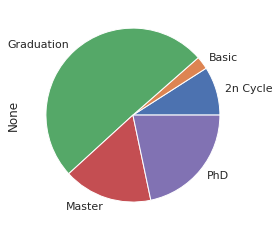

In [115]:
data1.groupby('Education').size().plot(kind = 'pie')
sns.set(rc={'figure.figsize':(4,4)})

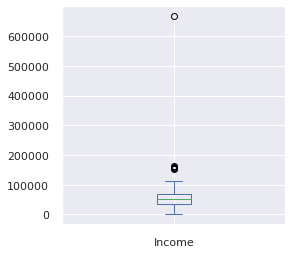

In [21]:
data1['Income'].plot(kind='box')              # Income coresponde a los ingresos de los clientes
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

**Información Quejas de los Clientes**

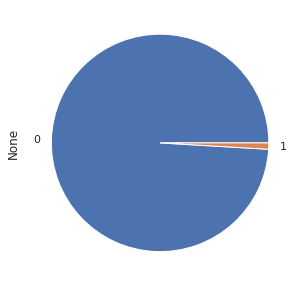

In [22]:
data1.groupby('Complain').size().plot(kind = 'pie')
sns.set(rc={'figure.figsize':(4,4)})

**Información Nivel de Respuesta Clientes a las Campañas**

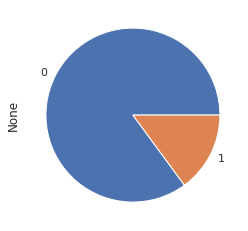

In [23]:
data1.groupby('Response').size().plot(kind = 'pie') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

In [24]:
data2 = data1.copy()

In [25]:
# Hay que transformar a numéricas las variables categóricas (object) para poder trabajar con ellas
data2.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [26]:
data2['Dt_Customer'] = pd.to_datetime(data2.Dt_Customer)

In [27]:
data2['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [28]:
obj_df = data2.select_dtypes(include=['object']).copy() # se eligen las variables categoricas (object) y se hace una copia
print(obj_df.columns)

Index(['Education', 'Marital_Status'], dtype='object')


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
lb_encoder = LabelEncoder()

In [31]:
#crear un ciclo for para que a cada una de las variables que tengan formato 'object' las cambie a formato numero
for col in obj_df.columns:
  data2[col] = lb_encoder.fit_transform(data2[col])

In [32]:
# Conmprobando de nuevo tipo de las variables
data2.dtypes

ID                              int64
Year_Birth                      int64
Education                       int64
Marital_Status                  int64
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [33]:
data2['Age'] = 2014 - data2['Year_Birth']   # la fecha 2014 se elige porque corresponde a la fecha en donde al parecer se realizó el estudio o de la fecha 
                                            # en la que proviene el dataset.  Age sería la edad de los clientes a la fecha 2014

In [34]:
data2['Age'].head(5)

0    57
1    60
2    49
3    30
4    33
Name: Age, dtype: int64

In [35]:
data2['age_range'] = (data2['Age']//5)*5     # se crea una columna qu corresponde a rango de edad

In [36]:
round(data2.pivot_table(['Income'],['age_range'],aggfunc= 'mean',fill_value=0),2)  #Una tabla que permita ver los Ingresos por Rangos de Edad

,Income
age_range,
15,46658.00
20,53683.17
25,43849.21
30,47567.93
35,50199.41
40,49754.75
45,52235.09
50,55498.55
55,56651.57


**Información de Respuesta de los Clientes, por Rango de Edad y Nivel de Ingreso**

In [37]:
round(data2.pivot_table(['Income'],['age_range'],['Response'],aggfunc= 'mean',fill_value=0),2)    # Response  1 indica si el cliente aceptó la oferta en la ultima campaña, 0 que no.

Income          
Response          0         1
age_range                    
15         47169.80  45378.50
20         45447.38  82508.42
25         41942.80  55807.64
30         44090.53  59777.49
35         49649.64  54639.90
40         48883.83  53977.36
45         51511.21  57509.11
50         54076.08  65049.43
55         54758.11  68336.91
60         55579.22  61810.50
65         62803.75  66809.77
70         67080.67  57466.62
110        36640.00      0.00
115        83532.00      0.00
120        60182.00      0.00

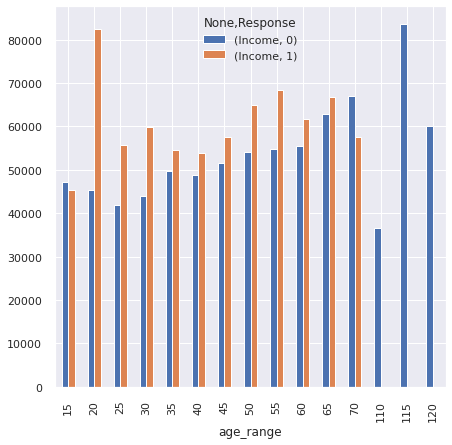

In [119]:
round(data2.pivot_table(['Income'],['age_range'],['Response'],aggfunc= 'mean',fill_value=0),2).plot(kind = 'bar' ) 
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [39]:
round(data2.pivot_table(['Income'],['age_range'],['Education'],aggfunc= 'mean',fill_value=0),2)

Income                                        
Education         0         1         2         3         4
age_range                                                  
15         57124.67  14421.00  46937.00      0.00      0.00
20         48948.80  18012.43  55769.06  81595.40  69926.00
25         32391.86  17403.20  46690.32  45802.89  53447.83
30         48668.90  25161.50  46197.49  41956.15  58285.64
35         39110.54  20756.83  53765.49  48525.91  55874.16
40         43827.58  18949.17  49222.01  52869.23  52596.16
45         59966.14  22796.75  52631.61  49687.66  53684.20
50         59967.78  23384.75  55747.72  58262.46  54169.41
55         58727.09  15056.00  56723.76  56986.33  56075.75
60         58877.89  20040.50  56744.48  53599.18  58446.58
65         77951.50  28389.00  62447.84  64005.14  64611.38
70             0.00      0.00  67273.33  63848.50  64221.50
110        36640.00      0.00      0.00      0.00      0.00
115            0.00      0.00      0.00      0.00  83532.00
120        60182.00      0.00      0.00      0.00      0.00

In [40]:
data2['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [41]:
data2.groupby('Dt_Customer').size()

Dt_Customer
2012-01-08     4
2012-01-09     1
2012-01-10     5
2012-01-11     2
2012-01-12     4
              ..
2014-12-02     3
2014-12-03     5
2014-12-04     2
2014-12-05    11
2014-12-06     1
Length: 663, dtype: int64

In [42]:
data2['Year'] = data2['Dt_Customer'].dt.year

In [43]:
data2.groupby('Year').size()

Year
2012     494
2013    1189
2014     557
dtype: int64

In [44]:
compras_promedio = data2[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Year']].\
groupby("Year").mean().sort_values(by="Year").reset_index()

In [45]:
compras_promedio.head(5)

,Year,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,2012,388.803644,29.718623,197.524291,44.473684,31.951417,53.012146
1,2013,300.317073,26.291001,165.540791,36.513036,26.904962,46.136249
2,2014,236.391382,23.296230,142.842011,33.524237,23.064632,31.535009


* **Tendencia de los Productos a travez del Tiempo**

In [46]:
round(data2.pivot_table(['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],['Year'],aggfunc= 'mean',fill_value=0),2)

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Year,,,,,,
2012,44.47,29.72,53.01,197.52,31.95,388.80
2013,36.51,26.29,46.14,165.54,26.90,300.32
2014,33.52,23.30,31.54,142.84,23.06,236.39


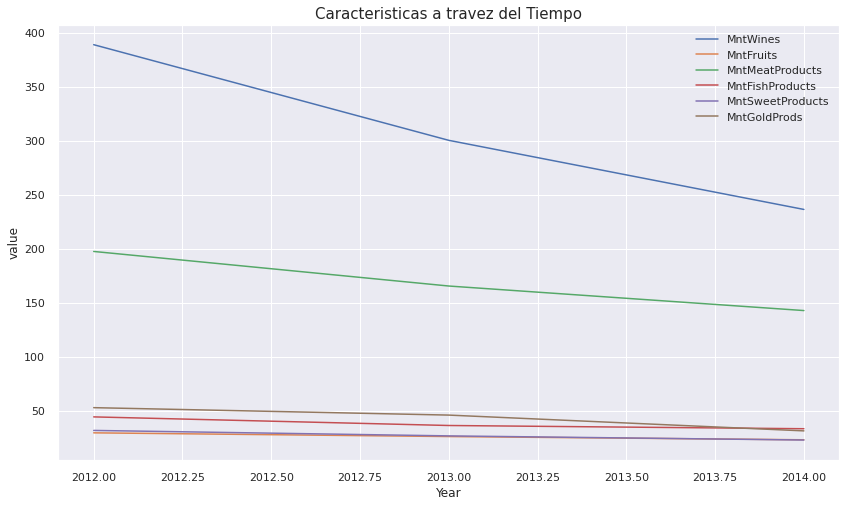

In [47]:
plt.figure(figsize=(14,8))
plt.title("Caracteristicas a travez del Tiempo", fontdict={"fontsize": 15})

lines = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

for line in lines:
    ax = sns.lineplot(x='Year', y=line, data=compras_promedio)
plt.ylabel("value")
plt.legend(lines)

# El nivel compra de los clientes viene en descenso (Los clientes están comprando menos)

*Comportamiento de Copra Según Marital Status

In [48]:
data2.pivot_table('NumWebPurchases', index= ('Marital_Status'), aggfunc='mean')

,NumWebPurchases
Marital_Status,
0,3.500000
1,5.000000
2,4.310345
3,4.087963
4,3.872917
5,4.081034
6,4.623377
7,7.000000


In [49]:
data2['Total_spend'] = data2['MntWines']+data2['MntFruits']+data2['MntMeatProducts']+data2['MntFishProducts']+data2['MntSweetProducts']+data2['MntGoldProds']

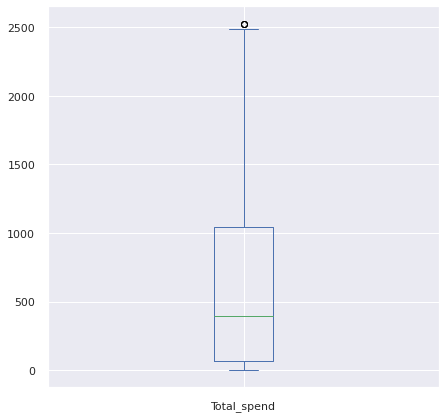

In [50]:
data2['Total_spend'].plot(kind='box') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

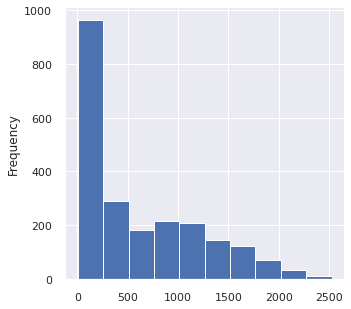

In [51]:
data2['Total_spend'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

**Clientes por Marital Status, por Respuesta a Campaña y Monto Compra Total**

In [52]:
round(data2.pivot_table(['Total_spend'],['Marital_Status'],['Response'],aggfunc= 'mean',fill_value=0),2)   # 1 indica si el cliente aceptó la oferta en la ultima campaña, 0 que no.

Total_spend         
Response                 0        1
Marital_Status                     
0                  1169.00  1216.00
1                   360.50    49.00
2                   510.58   994.15
3                   542.52   968.18
4                   496.66   993.99
5                   562.04  1010.08
6                   644.10  1027.95
7                   424.00   424.00

In [53]:
data2['Total_Sons'] = data2['Kidhome']+data2['Teenhome']

In [54]:
data2['Total_Sons'].head(3)

0    0
1    2
2    0
Name: Total_Sons, dtype: int64

In [55]:
data2['Total_Sons'].mean() 

0.9504464285714286

<AxesSubplot:xlabel='Total_Sons'>

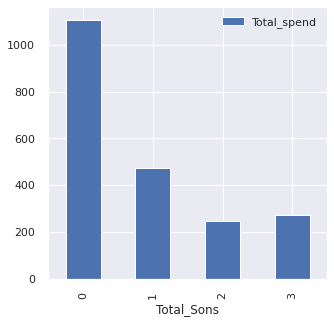

In [56]:
round(data2.pivot_table(['Total_spend'],['Total_Sons'],aggfunc= 'mean',fill_value=0),2).plot(kind = 'bar') 

## Correlaciones de Caracteristicas

In [57]:
data2.corr()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,age_range,Year,Total_spend,Total_Sons
ID,1.000000,0.000028,-0.003839,0.019580,0.012996,0.002406,-0.002580,-0.046524,-0.022878,0.004600,...,-0.015061,0.033883,NaN,NaN,-0.021968,-0.000028,0.004823,-0.006414,-0.018054,-0.000146
Year_Birth,0.000028,1.000000,-0.171390,-0.060580,-0.160899,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,...,-0.006539,-0.030128,NaN,NaN,0.021325,-1.000000,-0.992990,-0.028188,-0.111306,-0.090199
Education,-0.003839,-0.171390,1.000000,0.007090,0.119979,-0.045564,0.118485,-0.011728,0.197576,-0.080412,...,0.021369,-0.050540,NaN,NaN,0.090819,0.171390,0.174351,0.045356,0.092054,0.053189
Marital_Status,0.019580,-0.060580,0.007090,1.000000,0.021145,-0.022553,-0.003596,0.014159,0.008205,0.000593,...,0.018417,-0.005718,NaN,NaN,-0.011403,0.060580,0.059584,-0.018176,0.020713,-0.018756
Income,0.012996,-0.160899,0.119979,0.021145,1.000000,-0.425326,0.018965,-0.004061,0.576903,0.428791,...,0.087581,-0.027187,NaN,NaN,0.132867,0.160899,0.158731,0.022381,0.664775,-0.290858
Kidhome,0.002406,0.230176,-0.045564,-0.022553,-0.425326,1.000000,-0.036133,0.008827,-0.496297,-0.372581,...,-0.081716,0.040207,NaN,NaN,-0.080008,-0.230176,-0.228282,0.053339,-0.556669,0.689971
Teenhome,-0.002580,-0.352111,0.118485,-0.003596,0.018965,-0.036133,1.000000,0.016198,0.004846,-0.176764,...,-0.015605,0.003138,NaN,NaN,-0.154446,0.352111,0.346441,-0.008260,-0.138384,0.698433
Recency,-0.046524,-0.019871,-0.011728,0.014159,-0.004061,0.008827,0.016198,1.000000,0.016064,-0.004306,...,-0.001781,0.013231,NaN,NaN,-0.198437,0.019871,0.023418,-0.026084,0.020433,0.018053
MntWines,-0.022878,-0.157773,0.197576,0.008205,0.576903,-0.496297,0.004846,0.016064,1.000000,0.389637,...,0.205907,-0.039007,NaN,NaN,0.247254,0.157773,0.157840,-0.154188,0.891839,-0.351909
MntFruits,0.004600,-0.017917,-0.080412,0.000593,0.428791,-0.372581,-0.176764,-0.004306,0.389637,1.000000,...,-0.009773,-0.005166,NaN,NaN,0.125289,0.017917,0.017495,-0.055150,0.614229,-0.394853


In [58]:
data2.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,age_range,Year,Total_spend,Total_Sons
0,5524,1957,2,4,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,57,55,2012,1617,0
1,2174,1954,2,4,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,60,60,2014,27,2


In [59]:
data2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'age_range', 'Year', 'Total_spend', 'Total_Sons'],
      dtype='object')

In [60]:
data3 = data2.iloc[:,[2,3,4,8,33,32,29,25,23,28,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]

In [61]:
data3.head(2)

,Education,Marital_Status,Income,Recency,Total_Sons,Total_spend,Age,Complain,AcceptedCmp1,Response,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4
0,2,4,58138.0,58,0,1617,57,0,0,1,...,172,88,88,3,8,10,4,7,0,0
1,2,4,46344.0,38,2,27,60,0,0,0,...,2,1,6,2,1,1,2,5,0,0


## Diagrama de Correlaciones - Metodo Spearman

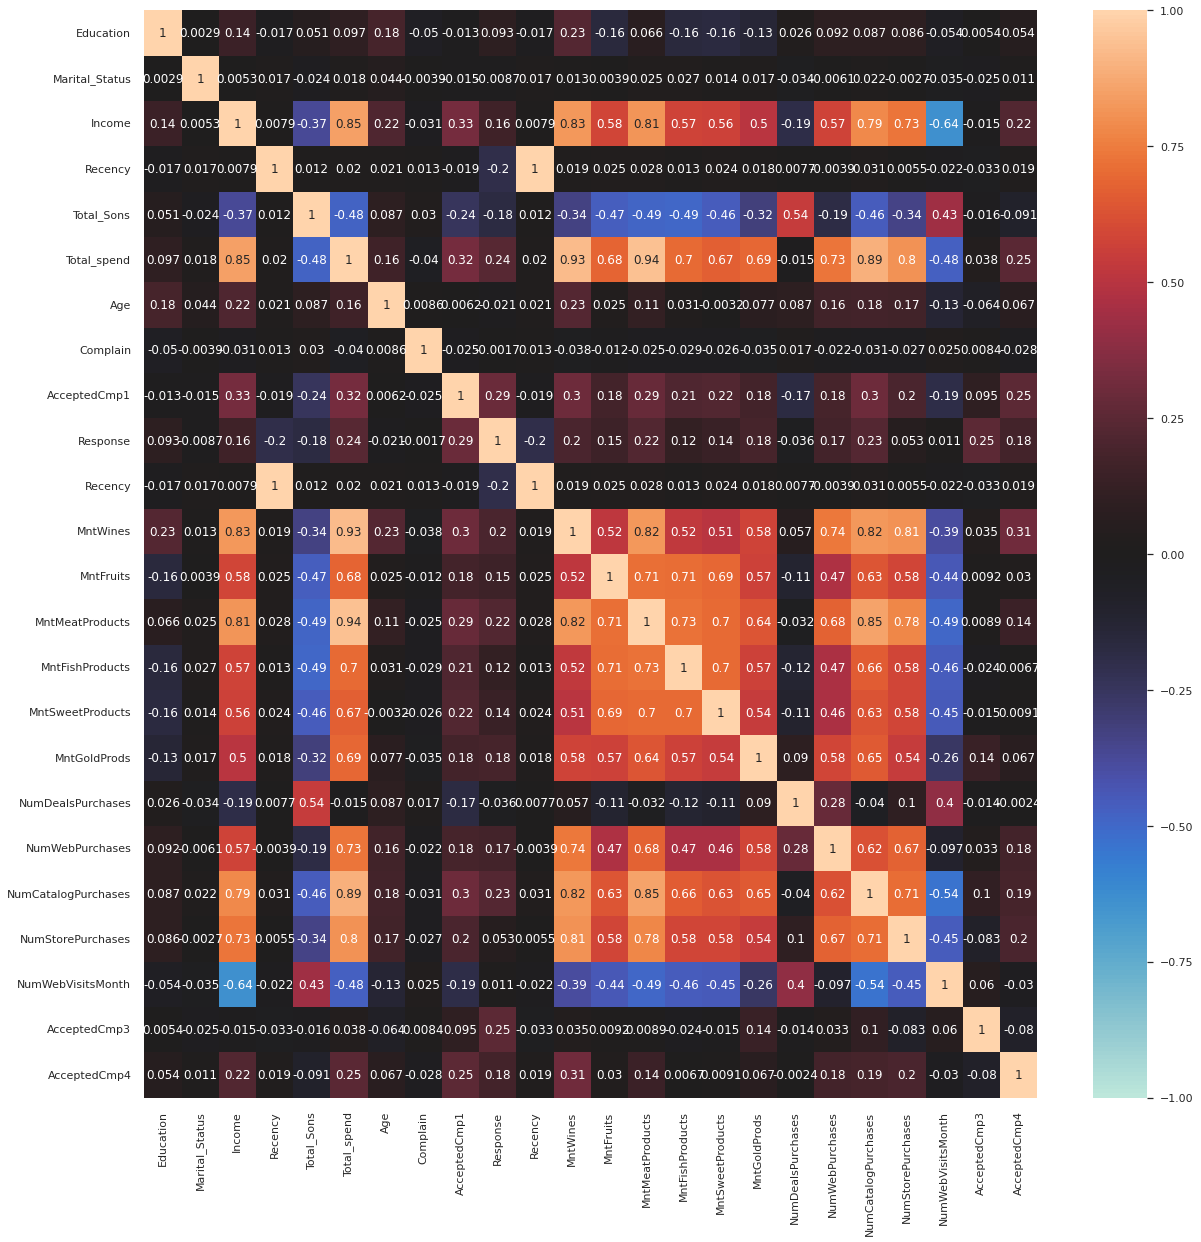

In [62]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(data3.corr(method='spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

# Scatter Matrix

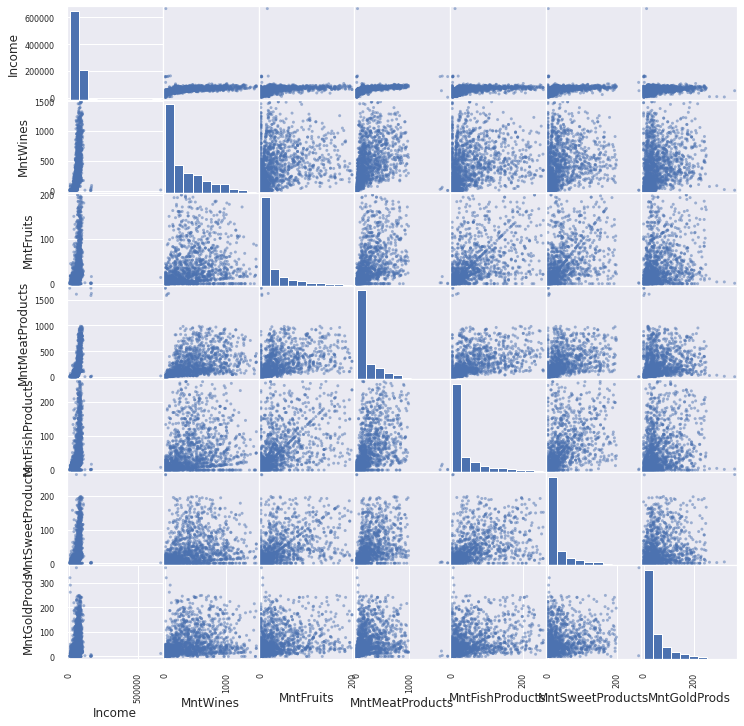

In [63]:
from pandas.plotting import scatter_matrix 
scatter_matrix((data2[['Income',"MntWines","MntFruits",'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]),figsize = (12, 12));

In [135]:
data1['Total_spend'] = data1['MntWines']+data1['MntFruits']+data1['MntMeatProducts']+data1['MntFishProducts']+data1['MntSweetProducts']+data1['MntGoldProds']

In [136]:
data1.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_spend
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,57,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,60,27


In [132]:
data1['Age'] = 2014 - data1['Year_Birth'] 

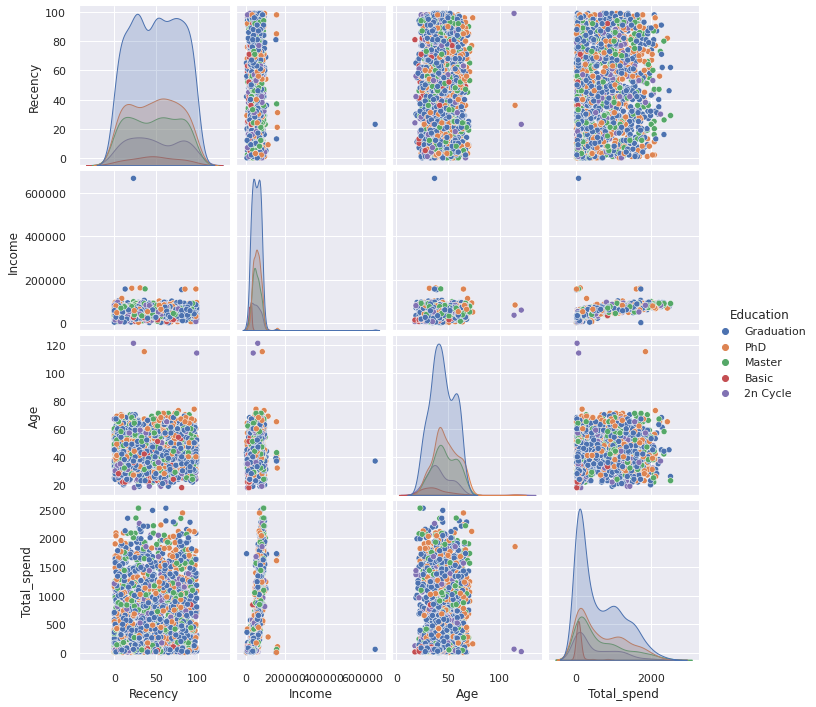

In [137]:
import seaborn as sns
sns.pairplot(data1, hue='Education', vars=['Recency', 'Income', 'Age', 'Total_spend'])   
2
plt.show()

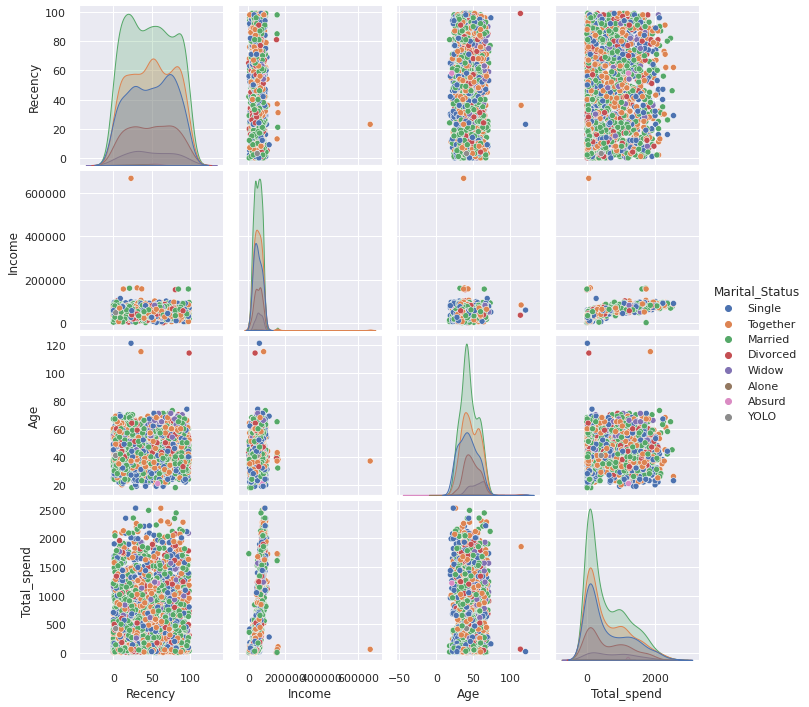

In [139]:
sns.pairplot(data1, hue='Marital_Status', vars=['Recency', 'Income', 'Age', 'Total_spend'])   
2
plt.show()

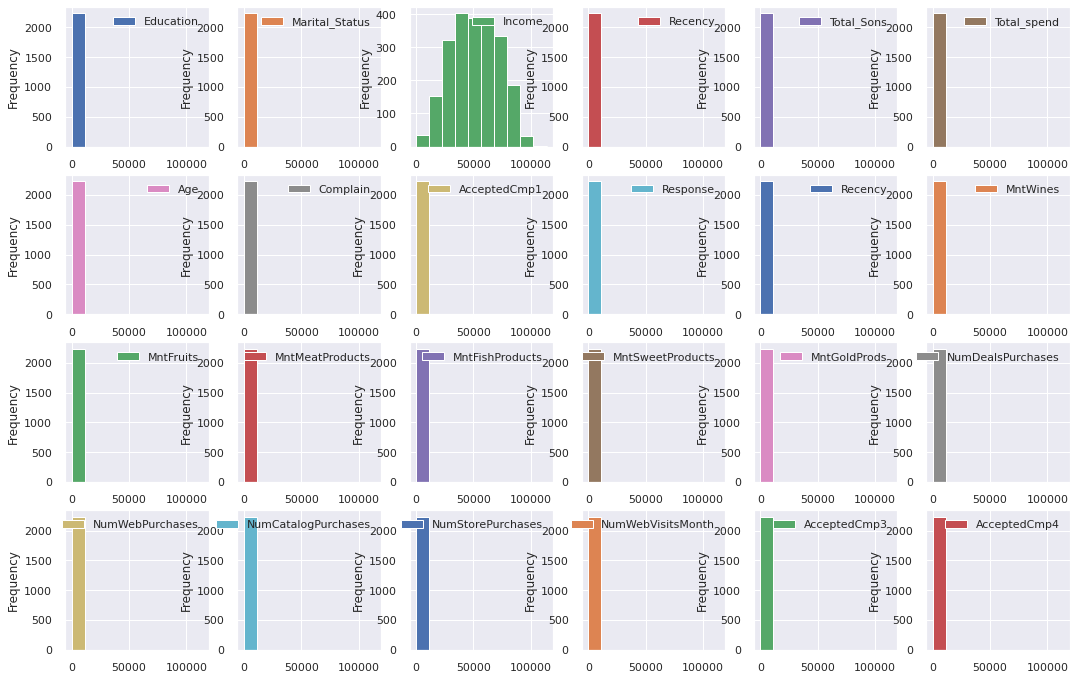

In [121]:
data3.plot(kind='hist',subplots=True, layout=(6,6), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(18,18)})
plt.show()       

#  Aspectos de los Clientes (Resumen)

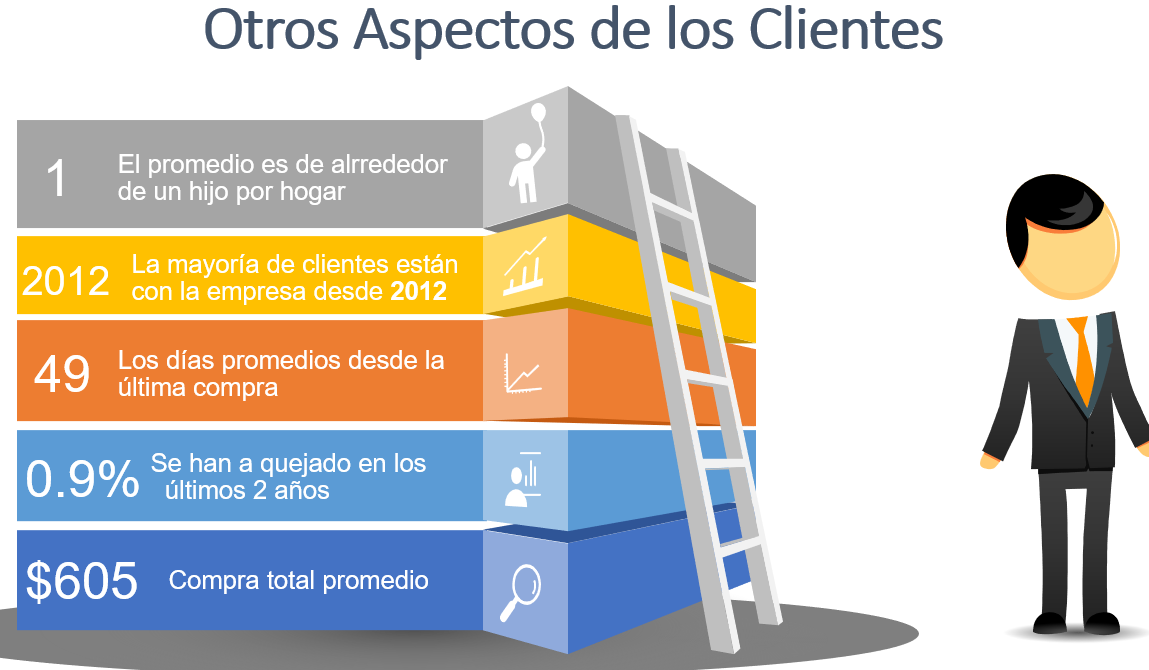

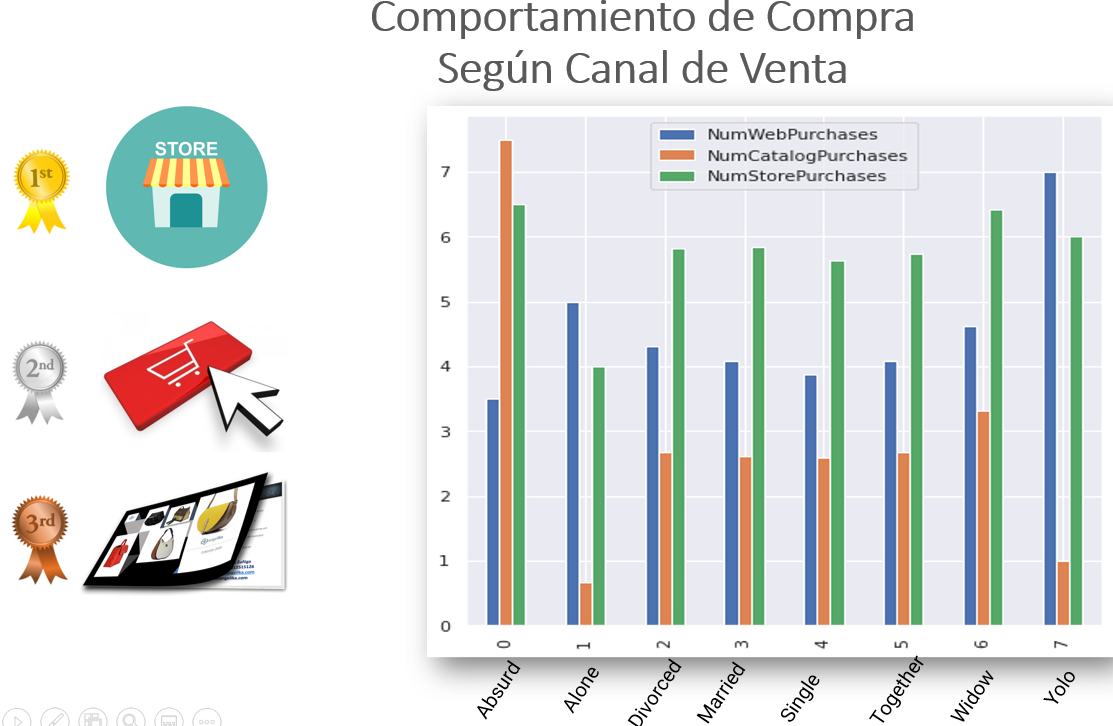

## ANOVA

In [65]:
import scipy.stats as stats

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
lb_encoder = LabelEncoder()

In [68]:
print("Influencia del Respuesta campana sobre la vistia web") 
print(stats.f_oneway(data3[data3["Response"]== 0]["NumWebVisitsMonth"], data3[data3["Response"]== 1]["NumWebVisitsMonth"]))
print()
print("Influencia del Respuesta campana sobre compra de frutas") 
print(stats.f_oneway(data3[data3["Response"]== 0]["MntFruits"], data3[data3["Response"]== 1]["MntFruits"]))
print()
print("Influencia del Respuesta campana sobre Las Ultima compra") 
print(stats.f_oneway(data3[data3["Response"]== 0]["Recency"], data3[data3["Response"]== 1]["Recency"]))
print()

Influencia del Respuesta campana sobre la vistia web
F_onewayResult(statistic=0.035569030632842884, pvalue=0.850425363665631)

Influencia del Respuesta campana sobre compra de frutas
F_onewayResult(statistic=35.690773060613886, pvalue=2.6831159908772832e-09)

Influencia del Respuesta campana sobre Las Ultima compra
F_onewayResult(statistic=array([91.73834608, 91.73834608]), pvalue=array([2.52037656e-21, 2.52037656e-21]))



## Datos a Partir del Anova

Se observa que el nivel de Respuesta positiva o no a la campaña influye en las visitas a las paginas web. pv 0.85 >= 0.05

Así como la Repuesta positiva o no a la campaña influye en el consumo o compras de los clientes. pv 2.68 >= 0.05

De igual forma la Repuesta positiva o no a la campaña influye en los días que tiene una persona de su ultima compra (influye en que vuelva a comprar o compre más seguido) pv 2.52 >= 0.05

**Con respecto a esto se procede a citar algunos aspectos de la influencia de la publicidad y como esta promueve el consumo:**

Una de las funciones de la publicidad es Persuadir, se crea preferencia por la marca, se debe convencer a los consumidores de que compren en el momento, como también que acepten visitas por el equipo de ventas.

La función de la publicidad no es vender: la publicidad es responsable de crear condiciones para la venta de productos. Para ello, transmite la idea al segmento de mercado objetivo, esperando que pueda coincidir con la idea y tenerla en cuenta a la hora de comprar.

han identificado diferentes factores que afectan la intención de compra entre los cuales se encuentran: la publicidad, el brand equity y el brand engagement. La publicidad actúa como un divulgador de información o de ideas con la intención de cambiar el comportamiento de un grupo de personas para que piense o actúe de determinada manera, también actúa como un diferenciador de una marca frente a la competencia.

## Clusters

In [69]:
X = data3  # Renombrando variable para utilizarla en Scikit-Learn

In [70]:
# Normalizando dataframe
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [71]:
pca = PCA()
pca.fit(X_std)

PCA()

In [72]:
evr = pca.explained_variance_ratio_
evr

array([2.95039170e-01, 8.76759115e-02, 7.78150389e-02, 5.95250206e-02,
       5.72979356e-02, 4.55044092e-02, 4.22801535e-02, 4.16282148e-02,
       3.53745153e-02, 3.22685146e-02, 2.93536660e-02, 2.69756117e-02,
       2.51299505e-02, 2.27556145e-02, 2.15295486e-02, 1.83440765e-02,
       1.76647375e-02, 1.59915604e-02, 1.52111539e-02, 1.28640295e-02,
       1.05551940e-02, 9.21597300e-03, 6.81411709e-33, 5.21081255e-33])

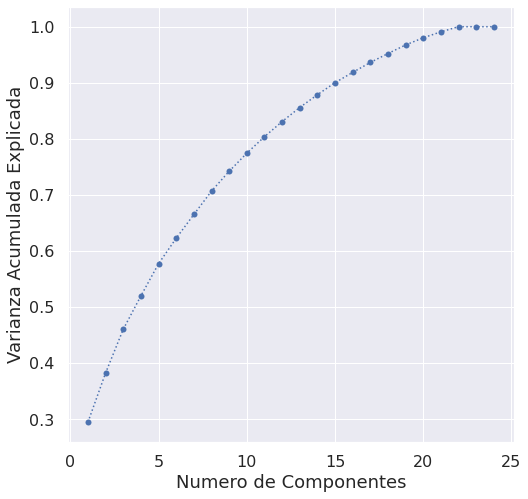

In [73]:
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, len(X.columns)+1), evr.cumsum(), marker='o', linestyle=':')
plt.xlabel('Numero de Componentes', fontsize=18)
plt.ylabel('Varianza Acumulada Explicada',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [74]:
for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Numero de Componentes Optimos:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(X_std)
scores_pca = pca.transform(X_std)

Numero de Componentes Optimos: 11


In [75]:
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Numero de Clusters Optimos:", n_clusters)

Numero de Clusters Optimos: 6


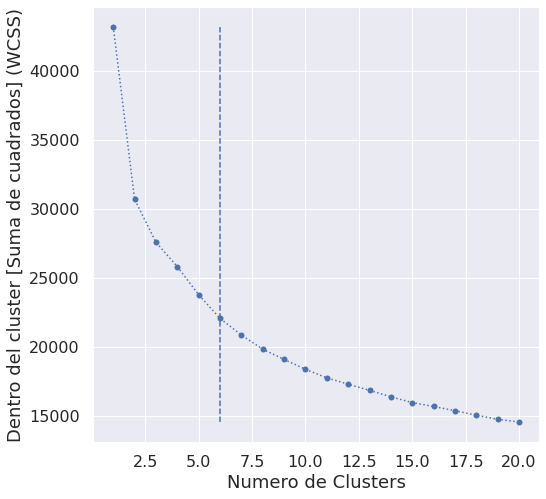

In [76]:
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle=':')
plt.vlines(KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', 
                       direction='decreasing').knee, ymin=min(wcss), ymax=max(wcss), linestyles='dashed')
plt.xlabel('Numero de Clusters', fontsize=18)
plt.ylabel('Dentro del cluster [Suma de cuadrados] (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [77]:
# Creando la optimizacion de parametros con PCA y K-Means
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca);

In [78]:
# Etiquentando cada uno de los datos dentro del cluster respectivo
df_seg_pca_kmeans = pd.concat([pd.DataFrame(X.reset_index(drop=True)), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

,Education,Marital_Status,Income,Recency,Total_Sons,Total_spend,Age,Complain,AcceptedCmp1,Response,...,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11,Cluster
0,2,4,58138.0,58,0,1617,57,0,0,1,...,0.191217,-0.201848,1.564585,0.665468,0.358474,-0.707176,0.244712,0.713807,-2.364099,3
1,2,4,46344.0,38,2,27,60,0,0,0,...,-0.237448,-0.268867,-1.100528,0.454989,0.393215,-0.230700,1.380610,0.583361,0.413131,1
2,2,5,71613.0,26,0,776,49,0,0,0,...,-0.618963,-1.188665,-0.842674,-0.216517,0.342134,-0.989259,-0.291614,-1.295741,-0.158980,2
3,2,5,26646.0,26,1,53,30,0,0,0,...,-1.166049,-0.158763,-0.138277,-0.603540,0.157797,-1.082316,-0.911823,0.089614,0.267084,1
4,4,3,58293.0,94,1,422,33,0,0,0,...,0.904207,-0.096774,0.254089,0.219044,-1.004580,0.771254,-1.253945,1.050345,-0.404130,4


#  Creando visualizacion de los datos con PCA

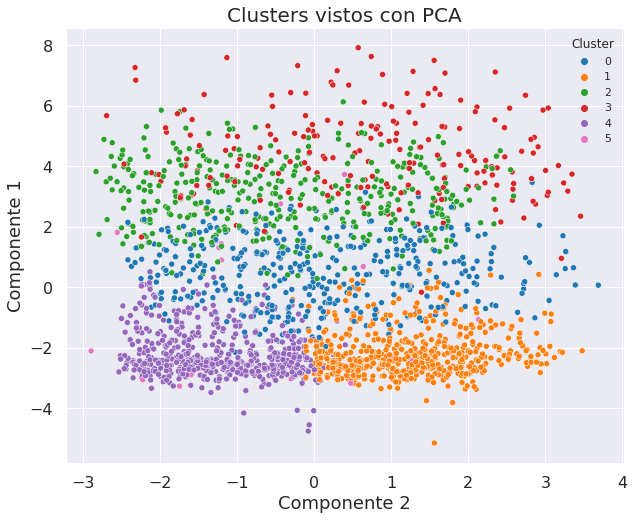

In [79]:
x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink'])
plt.title('Clusters vistos con PCA', fontsize=20)
plt.xlabel("Componente 2", fontsize=18)
plt.ylabel("Componente 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();

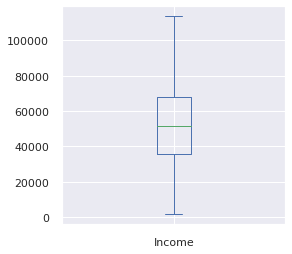

In [129]:
data3['Income'].plot(kind='box')
sns.set(rc={'figure.figsize':(4,4)})
plt.show()

In [81]:
quantiles1 = np.percentile(data3['Income'], [25,50,75])
quantiles1

array([35538.75, 51381.5 , 68289.75])

In [82]:
median1 = quantiles1[1]
IQR1 = quantiles1[2]-quantiles1[0]
sigma1 = 0.75*IQR1

In [83]:
data3 = data3.query("(Income > @median1 - 4*@sigma1) & (Income < @median1 + 4*@sigma1)")

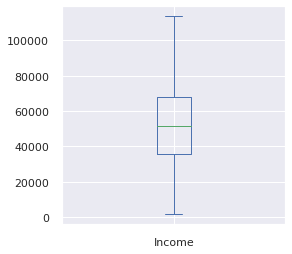

In [84]:
data3['Income'].plot(kind='box')
sns.set(rc={'figure.figsize':(4,4)})
plt.show()

In [85]:
data3.head(2)

,Education,Marital_Status,Income,Recency,Total_Sons,Total_spend,Age,Complain,AcceptedCmp1,Response,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4
0,2,4,58138.0,58,0,1617,57,0,0,1,...,172,88,88,3,8,10,4,7,0,0
1,2,4,46344.0,38,2,27,60,0,0,0,...,2,1,6,2,1,1,2,5,0,0


In [86]:
data3.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'Total_Sons',
       'Total_spend', 'Age', 'Complain', 'AcceptedCmp1', 'Response', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4'],
      dtype='object')

In [87]:
data4 = data3.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,22]]

In [88]:
data4.head(3)

,Education,Marital_Status,Income,Recency,Total_Sons,Total_spend,Age,Complain,AcceptedCmp1,Response,Recency,AcceptedCmp3
0,2,4,58138.0,58,0,1617,57,0,0,1,58,0
1,2,4,46344.0,38,2,27,60,0,0,0,38,0
2,2,5,71613.0,26,0,776,49,0,0,0,26,0


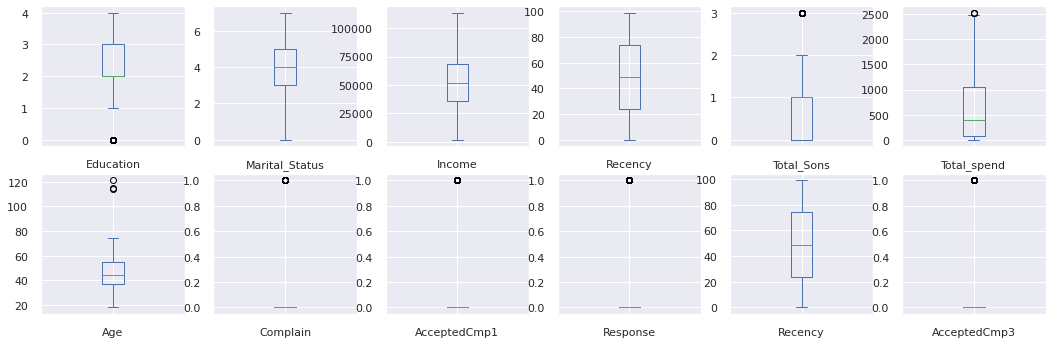

In [127]:
data4.plot(kind='box',subplots=True, layout=(6,6), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(18,18)})
plt.show()

In [90]:
X = data4  # Renombrando variable para utilizarla en Scikit-Learn

In [91]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [92]:
pca = PCA()
pca.fit(X_std)

PCA()

In [93]:
evr = pca.explained_variance_ratio_
evr

array([2.12715971e-01, 1.71947266e-01, 1.08049324e-01, 9.50427026e-02,
       8.46828591e-02, 8.27193460e-02, 6.82802343e-02, 6.41639675e-02,
       5.25782421e-02, 4.69899862e-02, 1.28301000e-02, 2.89539673e-33])

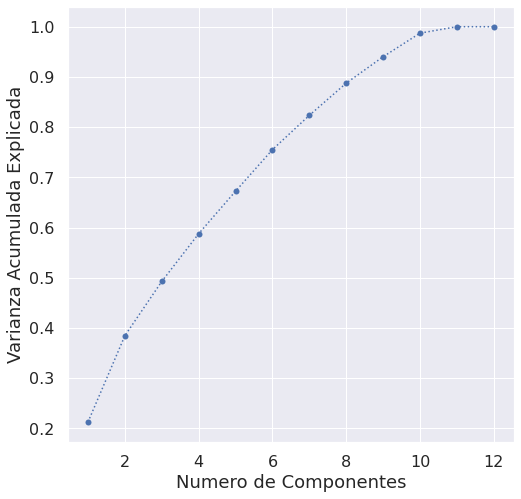

In [94]:
# Ploteando grafico de Componentes principales
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, len(X.columns)+1), evr.cumsum(), marker='o', linestyle=':')
plt.xlabel('Numero de Componentes', fontsize=18)
plt.ylabel('Varianza Acumulada Explicada',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [95]:
for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Numero de Componentes Optimos:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(X_std)
scores_pca = pca.transform(X_std)

Numero de Componentes Optimos: 7


#  K-Means

In [96]:
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Numero de Clusters Optimos:", n_clusters)

Numero de Clusters Optimos: 8


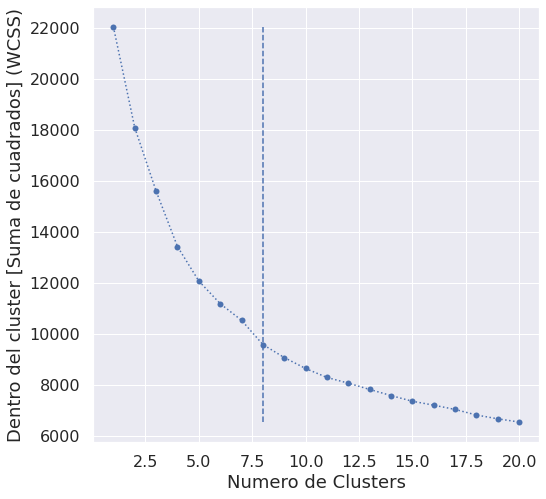

In [97]:
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle=':')
plt.vlines(KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', 
                       direction='decreasing').knee, ymin=min(wcss), ymax=max(wcss), linestyles='dashed')
plt.xlabel('Numero de Clusters', fontsize=18)
plt.ylabel('Dentro del cluster [Suma de cuadrados] (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [98]:
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca);

In [99]:
# Etiquentando cada uno de los datos dentro del cluster respectivo
df_seg_pca_kmeans = pd.concat([pd.DataFrame(X.reset_index(drop=True)), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

,Education,Marital_Status,Income,Recency,Total_Sons,Total_spend,Age,Complain,AcceptedCmp1,Response,Recency,AcceptedCmp3,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Cluster
0,2,4,58138.0,58,0,1617,57,0,0,1,58,0,2.176492,-0.489114,-0.081798,0.232445,0.266587,-0.440294,0.034249,1
1,2,4,46344.0,38,2,27,60,0,0,0,38,0,-1.271522,0.628670,1.190170,0.250734,0.254534,-0.122275,1.264720,0
2,2,5,71613.0,26,0,776,49,0,0,0,26,0,1.072183,0.625617,0.650678,-1.332110,0.239481,-1.027912,-0.195206,7
3,2,5,26646.0,26,1,53,30,0,0,0,26,0,-1.348940,1.386015,-0.582973,-0.848130,-0.118050,-1.256320,-0.534710,4
4,4,3,58293.0,94,1,422,33,0,0,0,94,0,-0.605204,-2.070959,-0.118083,0.536220,-0.805051,0.767010,-1.433612,1


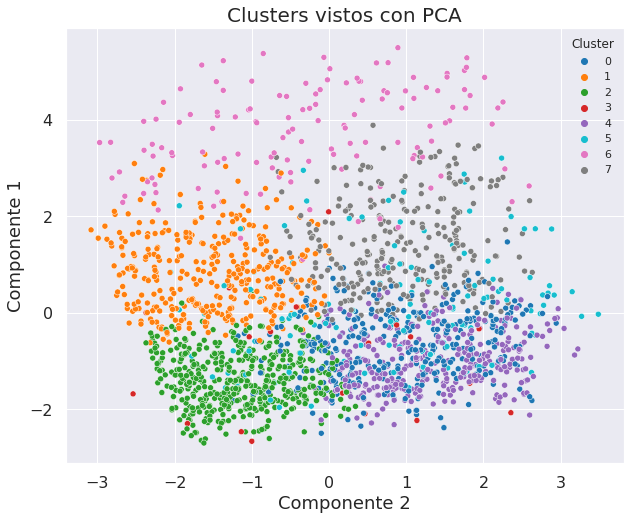

In [100]:
# Creando visualizacion de los datos con PCA

x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:cyan', 'tab:pink', 'tab:gray'])
plt.title('Clusters vistos con PCA', fontsize=20)
plt.xlabel("Componente 2", fontsize=18)
plt.ylabel("Componente 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();

In [101]:
data2['Cluster'] = df_seg_pca_kmeans['Cluster']
data2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,age_range,Year,Total_spend,Total_Sons,Cluster
0,5524,1957,2,4,58138.0,0,0,2012-04-09,58,635,...,0,3,11,1,57,55,2012,1617,0,1.0
1,2174,1954,2,4,46344.0,1,1,2014-08-03,38,11,...,0,3,11,0,60,60,2014,27,2,0.0
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,49,45,2013,776,0,7.0
3,6182,1984,2,5,26646.0,1,0,2014-10-02,26,11,...,0,3,11,0,30,30,2014,53,1,4.0
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,33,30,2014,422,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,2013-06-13,46,709,...,0,3,11,0,47,45,2013,1341,1,NaN
2236,4001,1946,4,5,64014.0,2,1,2014-10-06,56,406,...,0,3,11,0,68,65,2014,444,3,NaN
2237,7270,1981,2,2,56981.0,0,0,2014-01-25,91,908,...,0,3,11,0,33,30,2014,1241,0,NaN
2238,8235,1956,3,5,69245.0,0,1,2014-01-24,8,428,...,0,3,11,0,58,55,2014,843,1,NaN


In [102]:
pd.value_counts(data2['Cluster'])

2.0    493
1.0    400
0.0    377
4.0    357
7.0    305
6.0    145
5.0    134
3.0     21
Name: Cluster, dtype: int64

* Información de Cluster e Ingresos

In [103]:
round(df_seg_pca_kmeans.pivot_table('Income', index= 'Cluster', aggfunc= 'mean',fill_value=0),2)

,Income
Cluster,
0,47042.03
1,69236.35
2,37879.96
3,45242.29
4,32479.16
5,42811.93
6,80370.84
7,69509.19


* Información de Cluster y Edades

In [104]:
round(df_seg_pca_kmeans.pivot_table('Age', index= 'Cluster', aggfunc= 'mean',fill_value=0),2)

,Age
Cluster,
0,52.48
1,48.12
2,42.84
3,48.90
4,36.51
5,42.77
6,45.49
7,47.09


#  MODELO SUPERVISADO

In [105]:
# Importando bibliotecas
from pandas import read_csv 
import pandas as pd #manejo y estructuracion de datos y su manipulación
from pandas.plotting import scatter_matrix #diagramas de correlacción
from matplotlib import pyplot #Hacer gráficos en python
from sklearn.model_selection import train_test_split #lograr dividir las muestras
from sklearn.model_selection import cross_val_score #validación cruzada score 
from sklearn.model_selection import StratifiedKFold #validacion cruzada 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix #matriz de confusión
from sklearn.metrics import accuracy_score #score de validación cruzada

In [106]:
# Modelos de ML con que se va a trabajar
from sklearn.metrics import accuracy_score #score de validación cruzada 
from sklearn.linear_model import LogisticRegression #regresion logística
from sklearn.tree import DecisionTreeClassifier #arboles de decision
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #Análisis discriminante lineal 
from sklearn.naive_bayes import GaussianNB #Gauss Bayesiana
from sklearn.svm import SVC # Maquinas de Soporte Vectorial
from sklearn.model_selection import train_test_split

In [107]:
data4.head(3)

,Education,Marital_Status,Income,Recency,Total_Sons,Total_spend,Age,Complain,AcceptedCmp1,Response,Recency,AcceptedCmp3
0,2,4,58138.0,58,0,1617,57,0,0,1,58,0
1,2,4,46344.0,38,2,27,60,0,0,0,38,0
2,2,5,71613.0,26,0,776,49,0,0,0,26,0


In [108]:
# Conjunto de datos de validación dividida
# Con el 80% se crea el modelo y con el 20% se entrena

array = data4.values #los datos ahora se transforman en un arreglo

X = array[:,[0,1,2,3,4,5,6,7,8,10,11]]  # se toman los datos, sin la clase de clasificación
y = array[:,9] # se toman los datos 

# Se dividen los datos en conjunto de entrenamiento y prueba, se utiliza random_state = 0 para que no dé
# resultados diferentes si se vuelve a correr. 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [109]:
# Algoritmos de Comprobación, se guardan en una lista
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))

In [110]:
import warnings
warnings.filterwarnings('ignore')

resultados = []
names = []


# Si se necesita tanto el índice o nombre, así como el elemento, se usa for indice, elemento en lista
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) # Declaracion de la validación cruzada, las características
    cv_resultados = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') # genera la precisión de la validación cruzada y la guarda en la variable cv_resultados en lista
    resultados.append(cv_resultados)  # genera la precisión de la validación cruzada y la guarda en la variable cv_resultados en matrices, esto para hacer el boxplot.
    names.append(name) # names en matrices
    print('%s: %f (%f)' % (name, cv_resultados.mean(), cv_resultados.std()))

LR: 0.840346 (0.009922)
LDA: 0.859378 (0.026470)
KNN: 0.829681 (0.016206)
CART: 0.817312 (0.027354)
NB: 0.848760 (0.021988)
SVC: 0.842019 (0.002051)


In [111]:

model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
prediccion = model.predict(X_test)

In [112]:
mc =pd.DataFrame(confusion_matrix(Y_test, prediccion, labels=[0,1]), 
                 index = [0,1],  
                 columns = [0,1])  
 
# Evaluando Predicciones
print("ROC:", accuracy_score(Y_test, prediccion),sep='\n')
print("")
print("Matriz de Confusión:", mc,sep='\n')

ROC:
0.8791946308724832

Matriz de Confusión:
     0   1
0  374  21
1   33  19


# Resumen de Caracteristicas 

In [113]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,2232.0,2.391129,1.124589,0.0,2.00,2.0,3.00,4.0
Marital_Status,2232.0,3.729391,1.075907,0.0,3.00,4.0,5.00,7.0
Income,2232.0,51630.926971,20601.679542,1730.0,35434.75,51381.5,68118.00,113734.0
Recency,2232.0,49.111111,28.952893,0.0,24.00,49.0,74.00,99.0
Total_Sons,2232.0,0.951613,0.751742,0.0,0.00,1.0,1.00,3.0
Total_spend,2232.0,605.596326,601.444172,5.0,69.00,396.5,1044.25,2525.0
Age,2232.0,45.207437,11.990340,18.0,37.00,44.0,55.00,121.0
Complain,2232.0,0.009409,0.096562,0.0,0.00,0.0,0.00,1.0
AcceptedCmp1,2232.0,0.064516,0.245725,0.0,0.00,0.0,0.00,1.0
Response,2232.0,0.149642,0.356800,0.0,0.00,0.0,0.00,1.0


#  Conclusiones

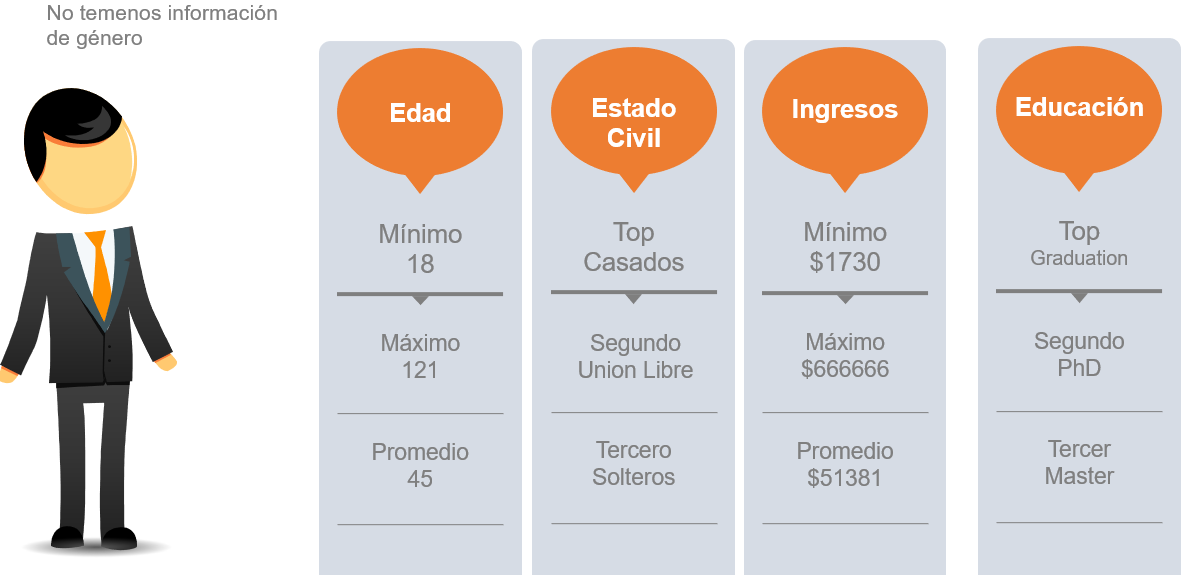